## Applying the MobileNet model on oversampled dataset and the augmented dataset using ImageDataGenerator.

Programmer: Sneha Ravi Chandran

Purpose: Implementation of MobileNet V2 model.

In [1]:
# Importing Tensorflow and keras libraries and packages necessary to build the model
import os
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

In [2]:
# Original dataset paths
old_train_dir = "C:\\Users\\sneha\\Desktop\\NeuralNetworks\\New\\old_train\\"
old_valid_dir = "C:\\Users\\sneha\\Desktop\\NeuralNetworks\\New\\old_valid\\"

# Oversampled dataset paths
new_train_dir = "C:\\Users\\sneha\\Desktop\\NeuralNetworks\\new_train\\"
new_valid_dir = "C:\\Users\\sneha\\Desktop\\NeuralNetworks\\new_valid\\"

# MobileNet V2 Model

In [3]:
batch_size = 32                               # number of samples that will be generated throw the network is set to 128
epochs = 10                                   # we iterate through 10 times by setting the value of epoch to 10
IMG_HEIGHT = 224                              # images height set to 160
IMG_WIDTH = 224                               # image width is set to 160

## On oversampled dataset

In [4]:
# Below we have created first ImageDataGenerator which has no data augmentation.
''' target_size	will resized the image to the specified dimension 
    batch_size of 32
    class_mode can take categorical, binary or sparse value. Here categorical is chosen.
    shuffle takes a boolean default value as TRUE
'''
train_img_gen = ImageDataGenerator(rescale=1./255)

train_data_gen = train_img_gen.flow_from_directory(directory=new_train_dir, 
                                                   target_size=(IMG_HEIGHT, IMG_WIDTH), 
                                                   batch_size=batch_size, 
                                                   class_mode='categorical', shuffle=True)


Found 6488 images belonging to 5 classes.


In [5]:
val_img_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = val_img_gen.flow_from_directory(directory=new_valid_dir, 
                                               target_size=(IMG_HEIGHT, IMG_WIDTH), 
                                               batch_size=batch_size, 
                                               class_mode='categorical')


Found 1625 images belonging to 5 classes.


In [6]:
# Model Creation
conv_feature_extractor = tf.keras.Sequential([
    hub.KerasLayer('https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
])

conv_feature_extractor.trainable = False

In [7]:
mobile_net = tf.keras.Sequential([
                       conv_feature_extractor,
                       Dense(5, activation='softmax')
                      ])

# printing the summary of the model
mobile_net.summary()                                                            


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [8]:
# Model Compilation
mobile_net.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [9]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [10]:
# Model Fitting
history = mobile_net.fit_generator(train_data_gen,
                                   epochs=epochs,
                                   validation_data= val_data_gen)

Epoch 1/10
203/203 [==============================] - 1360s 7s/step - loss: 1.0896 - accuracy: 0.5572 - val_loss: 0.9359 - val_accuracy: 0.6148
Epoch 2/10
203/203 [==============================] - 1279s 6s/step - loss: 0.8582 - accuracy: 0.6575 - val_loss: 0.8956 - val_accuracy: 0.6332
Epoch 3/10
203/203 [==============================] - 1317s 6s/step - loss: 0.7838 - accuracy: 0.6845 - val_loss: 0.8530 - val_accuracy: 0.6474
Epoch 4/10
203/203 [==============================] - 1350s 7s/step - loss: 0.7498 - accuracy: 0.7002 - val_loss: 0.8298 - val_accuracy: 0.6615
Epoch 5/10
203/203 [==============================] - 1384s 7s/step - loss: 0.7205 - accuracy: 0.7178 - val_loss: 0.8267 - val_accuracy: 0.6738
Epoch 6/10
203/203 [==============================] - 1383s 7s/step - loss: 0.6896 - accuracy: 0.7335 - val_loss: 0.8074 - val_accuracy: 0.6732
Epoch 7/10
203/203 [==============================] - 1332s 7s/step - loss: 0.6735 - accuracy: 0.7355 - val_loss: 0.8166 - val_accuracy:

### Plotting Accuracy and Validation curve for the oversampled dataset

In [13]:
# Plotting Resulting Accuracy and Loss

import matplotlib.pyplot as plt
%matplotlib inline

def acc_loss_plot(history, epochs):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

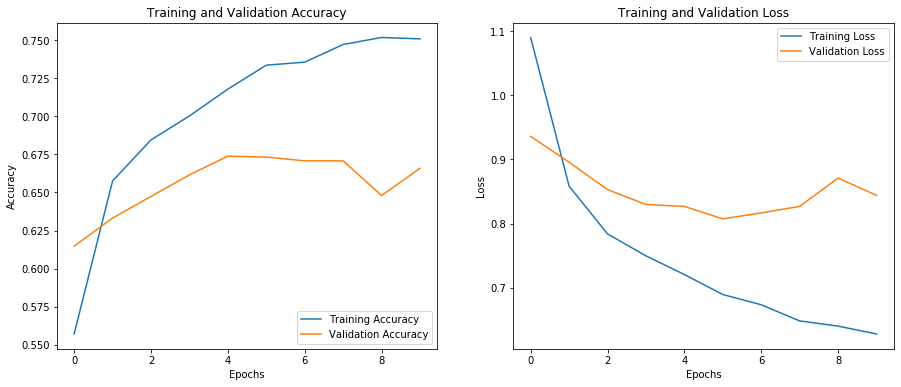

In [14]:
acc_loss_plot(history, epochs)

## Applying model on augmented dataset using ImageDataGenerator 

In [15]:
'''
Combining Various Data Augmentations like Flipping Images Horizontally by setting
it to True, Image rotation by 45 degree, Range for random zoom is 50 etc
'''
train_img_gen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=45, 
                                   width_shift_range=.15, 
                                   height_shift_range=.15, 
                                   horizontal_flip=True, 
                                   zoom_range=0.5)

train_data_gen = train_img_gen.flow_from_directory(old_train_dir, 
                                                   target_size=(IMG_HEIGHT, IMG_WIDTH), 
                                                   batch_size=batch_size, 
                                                   class_mode='categorical', shuffle=True)


Found 2632 images belonging to 5 classes.


In [16]:
val_img_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = val_img_gen.flow_from_directory(old_valid_dir, 
                                               target_size=(IMG_HEIGHT, IMG_WIDTH), 
                                               batch_size=batch_size, 
                                               class_mode='categorical')

Found 466 images belonging to 5 classes.


In [17]:
# Model Creation
conv_feature_extractor = tf.keras.Sequential([
    hub.KerasLayer('https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
])

conv_feature_extractor.trainable = False

In [18]:
mobile_net_old = tf.keras.Sequential([
                       conv_feature_extractor,
                       Dense(5, activation='softmax')
                      ])

# printing the summary of the model
mobile_net_old.summary()  

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 1280)              2257984   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [19]:
# Model Creation
mobile_net_old.compile(optimizer='adam',                                            # Model Compilation and Fitting
                   loss='categorical_crossentropy', 
                   metrics=['accuracy'])

In [20]:
# Model Fitting
history_old = mobile_net_old.fit_generator(train_data_gen,
                                   epochs=epochs,
                                   validation_data= val_data_gen)

Epoch 1/10
83/83 [==============================] - 456s 5s/step - loss: 0.9875 - accuracy: 0.6451 - val_loss: 0.8784 - val_accuracy: 0.6652
Epoch 2/10
83/83 [==============================] - 438s 5s/step - loss: 0.7936 - accuracy: 0.7033 - val_loss: 0.9051 - val_accuracy: 0.6459
Epoch 3/10
83/83 [==============================] - 442s 5s/step - loss: 0.7437 - accuracy: 0.7226 - val_loss: 0.7671 - val_accuracy: 0.7060
Epoch 4/10
83/83 [==============================] - 448s 5s/step - loss: 0.7112 - accuracy: 0.7348 - val_loss: 0.7604 - val_accuracy: 0.6931
Epoch 5/10
83/83 [==============================] - 442s 5s/step - loss: 0.6861 - accuracy: 0.7454 - val_loss: 0.7295 - val_accuracy: 0.7232
Epoch 6/10
83/83 [==============================] - 442s 5s/step - loss: 0.6830 - accuracy: 0.7477 - val_loss: 0.7336 - val_accuracy: 0.7124
Epoch 7/10
83/83 [==============================] - 443s 5s/step - loss: 0.6536 - accuracy: 0.7549 - val_loss: 0.7135 - val_accuracy: 0.7039
Epoch 8/10
83

### Plotting Accuracy and Validation curve for the oversampled dataset

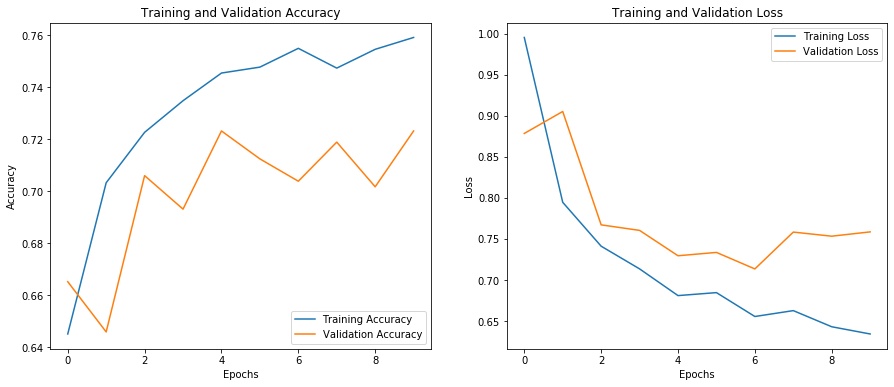

In [21]:
acc_loss_plot(history_old, epochs)